In [1]:
# 1. Data Loading and Exploration

# 1. Load the dataset
from google.colab import files
import pandas as pd

uploaded = files.upload()  # Upload file manually
file_name = 'train.csv'    # Replace with your filename if different

try:
    df = pd.read_csv(file_name)
    print("File loaded successfully.")
except Exception as e:
    print(f"Error loading file: {e}")

# 2. Explore initial structure
print("\n--- DataFrame Info ---")
print(df.info())

print("\n--- First 5 Rows ---")
print(df.head())

# 3. Summarize features and target variable
features = df.columns[:-1]  # All columns except the last
target = df.columns[-1]     # Last column is the target

print(f"\nNumber of features: {len(features)}")
print("Features:", features.tolist())
print("Target variable:", target)

# 4. Check data types
print("\n--- Data Types Summary ---")
print(df.dtypes.value_counts())

# Optional: List binary features (0/1 values)
binary_features = [col for col in df.columns if df[col].nunique() == 2]
print(f"\nBinary features ({len(binary_features)}): {binary_features}")

# 5. Basic descriptive statistics
print("\n--- Descriptive Statistics ---")
print(df.describe())


Saving train.csv to train.csv
File loaded successfully.

--- DataFrame Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2

In [2]:
#  2. Data Cleaning and Preprocessing
# Check for missing/null values
print("--- Missing Values in Each Column ---")
missing = df.isnull().sum()
print(missing[missing > 0] if missing.sum() > 0 else "No missing values found.")

# Optional: drop rows/columns with missing values if any
# df = df.dropna()  # or df.fillna(method='ffill'), etc.

# Check for categorical data types
print("\n--- Data Types Overview ---")
print(df.dtypes)

# In this dataset, all columns are already numeric (int or float), including the target `price_range`
# But if there were categorical columns (dtype = object), we would convert them like this:
categorical_cols = df.select_dtypes(include='object').columns.tolist()

if categorical_cols:
    print("\n--- Transforming Categorical Columns ---")
    print("Categorical columns:", categorical_cols)
    df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)
    print("One-hot encoding applied.")
else:
    print("No categorical columns found. All features are already numerical.")

# Final check
print("\n--- DataFrame Shape After Cleaning ---")
print(df.shape)

--- Missing Values in Each Column ---
No missing values found.

--- Data Types Overview ---
battery_power      int64
blue               int64
clock_speed      float64
dual_sim           int64
fc                 int64
four_g             int64
int_memory         int64
m_dep            float64
mobile_wt          int64
n_cores            int64
pc                 int64
px_height          int64
px_width           int64
ram                int64
sc_h               int64
sc_w               int64
talk_time          int64
three_g            int64
touch_screen       int64
wifi               int64
price_range        int64
dtype: object
No categorical columns found. All features are already numerical.

--- DataFrame Shape After Cleaning ---
(2000, 21)


In [3]:
# 3. Statistical Analysis with NumPy and SciPy
import numpy as np
from scipy import stats

# Central Tendency
mean_vals = df.mean()
median_vals = df.median()
mode_vals = df.mode().iloc[0]  # mode returns DataFrame

# Variability
range_vals = df.max() - df.min()
variance_vals = df.var()
std_vals = df.std()

# Skewness and Kurtosis
skewness_vals = df.skew()
kurtosis_vals = df.kurtosis()

# Hypothesis testing: RAM по price_range = 0 и 3
group0 = df[df['price_range'] == 0]['ram']
group3 = df[df['price_range'] == 3]['ram']
t_stat, p_val = stats.ttest_ind(group0, group3)

# Feature-target correlation
pearson_corrs = {}
for col in df.columns:
    if col != 'price_range':
        corr, _ = stats.pearsonr(df[col], df['price_range'])
        pearson_corrs[col] = round(corr, 4)

# Normality test (Shapiro) for 'ram'
shapiro_stat, shapiro_p = stats.shapiro(df['ram'])

# Displaying results
print("CENTRAL TENDENCY:")
print("Mean:\n", mean_vals.round(2))
print("\nMedian:\n", median_vals.round(2))
print("\nMode:\n", mode_vals)

print("\nVARIABILITY:")
print("Range:\n", range_vals)
print("\nVariance:\n", variance_vals.round(2))
print("\nStandard Deviation:\n", std_vals.round(2))

print("\nSKEWNESS:\n", skewness_vals.round(2))
print("\nKURTOSIS:\n", kurtosis_vals.round(2))

print("\nT-TEST (RAM comparison between price_range 0 and 3):")
print(f"t-statistic = {t_stat:.4f}, p-value = {p_val:.4f}")

print("\nPEARSON CORRELATION WITH price_range:")
for feature, corr_val in pearson_corrs.items():
    print(f"{feature}: {corr_val}")

print(f"\nSHAPIRO-WILK NORMALITY TEST for RAM:\nStatistic = {shapiro_stat:.4f}, p-value = {shapiro_p:.4f}")

CENTRAL TENDENCY:
Mean:
 battery_power    1238.52
blue                0.50
clock_speed         1.52
dual_sim            0.51
fc                  4.31
four_g              0.52
int_memory         32.05
m_dep               0.50
mobile_wt         140.25
n_cores             4.52
pc                  9.92
px_height         645.11
px_width         1251.52
ram              2124.21
sc_h               12.31
sc_w                5.77
talk_time          11.01
three_g             0.76
touch_screen        0.50
wifi                0.51
price_range         1.50
dtype: float64

Median:
 battery_power    1226.0
blue                0.0
clock_speed         1.5
dual_sim            1.0
fc                  3.0
four_g              1.0
int_memory         32.0
m_dep               0.5
mobile_wt         141.0
n_cores             4.0
pc                 10.0
px_height         564.0
px_width         1247.0
ram              2146.5
sc_h               12.0
sc_w                5.0
talk_time          11.0
three_g          

Insights from Statistical Analysis (Task 3)
1. Central Tendency (Mean, Median, Mode)
Most features have close mean and median values, indicating relatively symmetric distributions.

Example:

ram:

Mean = 2124

Median = 2146

Mode = 1229
➤ Suggests a slight right skew, which is confirmed by skewness = 0.01.

2. Variability (Range, Variance, Standard Deviation)
ram has the highest variability, with a wide range (3742) and large standard deviation (>1000).
➤ Indicates significant differences in memory capacity among devices.

Other highly variable features include:

battery_power (range = 1497)

px_height and px_width (ranges close to 2000), suggesting a wide variety of screen resolutions.

3. Skewness
Most features have near-zero skewness, indicating approximately symmetrical distributions.

Strongly skewed features:

fc (front camera): positively skewed (1.02) → more phones with low front camera MP.

three_g: negatively skewed (-1.23) → most phones support 3G.

4. Kurtosis
Most features have negative kurtosis (platykurtic), indicating flat distributions:

battery_power: -1.22

ram: -1.19
➤ Fewer extreme values; values are more evenly spread around the center.

5. T-Test (RAM comparison between lowest and highest price_range)
t-statistic = -111.37, p-value < 0.0001
➤ Highly significant difference in RAM between low-end and high-end phones.
➤ RAM is a major differentiator of price.

6. Pearson Correlation with price_range
ram shows the strongest positive correlation with price_range (0.917).
➤ Suggests that RAM is a key indicator of a phone’s price segment.

Moderate correlation:

px_width (0.1658), px_height (0.1489), and battery_power (0.2007)

Most other features have weak or negligible correlation.

7. Normality Check (Shapiro-Wilk test on RAM)
p-value = 0.0000 → reject null hypothesis.
➤ RAM distribution is not normal, which may impact modeling assumptions.


Key Takeaways


RAM is the most important predictor of price category.

Most features are symmetrically distributed but have flat (non-peaked) distributions.

Some features (e.g., 3G, front camera) are skewed, indicating concentration of values on one side.

Several features show weak correlation with price and may not add much predictive value.

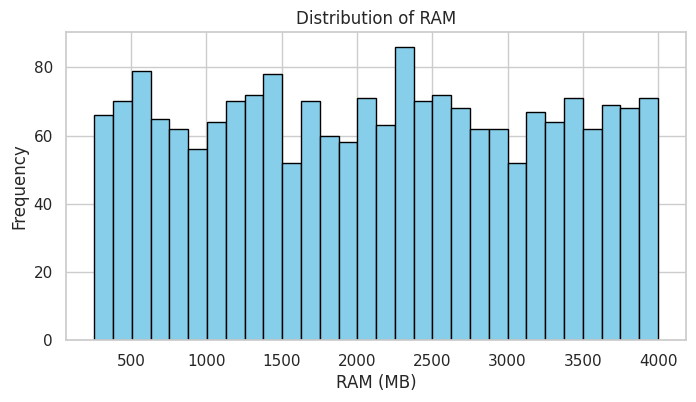

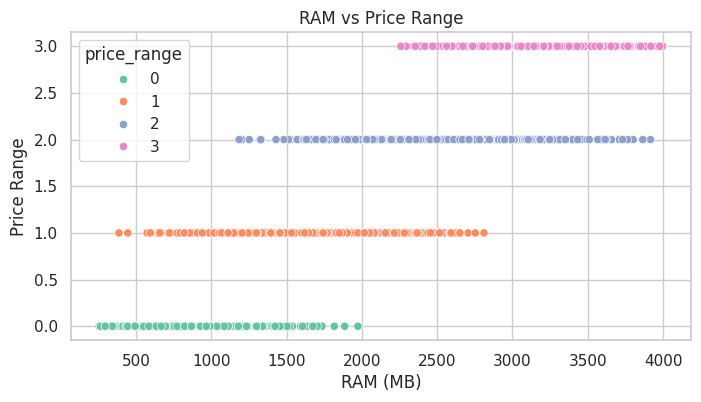

/tmp/ipython-input-4-3421226483.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='price_range', y='battery_power', palette='pastel')


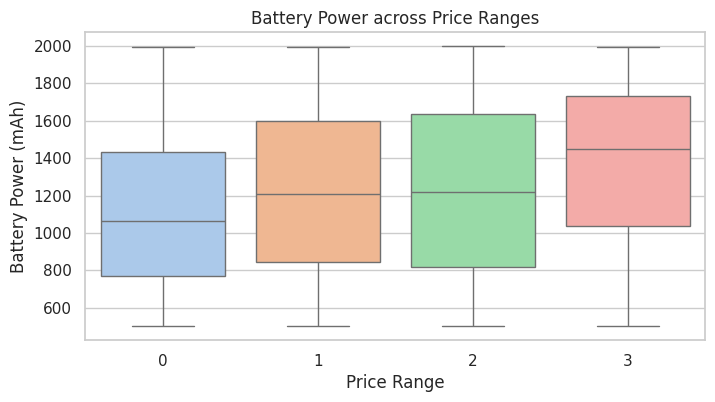

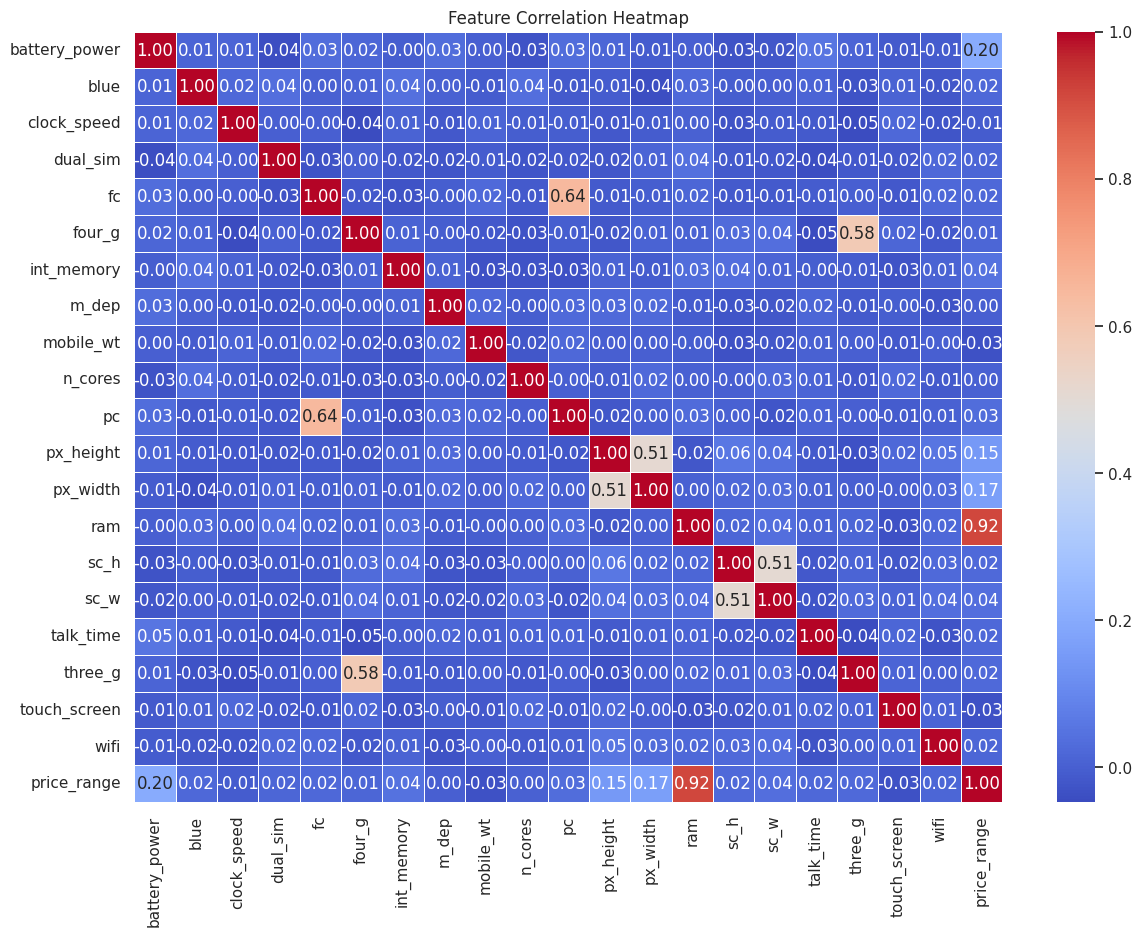

In [4]:
# 4. Data Visualization with Matplotlib:

import matplotlib.pyplot as plt
import seaborn as sns

# Set a consistent style
sns.set(style='whitegrid', palette='muted')

# === HISTOGRAMS ===
# Histogram of RAM
plt.figure(figsize=(8, 4))
plt.hist(df['ram'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of RAM')
plt.xlabel('RAM (MB)')
plt.ylabel('Frequency')
plt.show()

# === SCATTER PLOTS ===
# Scatter plot: RAM vs Price Range
plt.figure(figsize=(8, 4))
sns.scatterplot(data=df, x='ram', y='price_range', hue='price_range', palette='Set2')
plt.title('RAM vs Price Range')
plt.xlabel('RAM (MB)')
plt.ylabel('Price Range')
plt.show()

# === BOX PLOTS ===
# Box plot: Battery Power across Price Ranges
plt.figure(figsize=(8, 4))
sns.boxplot(data=df, x='price_range', y='battery_power', palette='pastel')
plt.title('Battery Power across Price Ranges')
plt.xlabel('Price Range')
plt.ylabel('Battery Power (mAh)')
plt.show()

# === HEATMAP ===
# Correlation heatmap
plt.figure(figsize=(14, 10))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title('Feature Correlation Heatmap')
plt.show()


5. Insight Synthesis and Conclusion

Key Determinants of Mobile Price Classification
RAM is by far the strongest predictor of mobile price category.

This was supported by both statistical correlation (Pearson r = 0.917) and visual patterns in scatter plots.

Pixel Width and Pixel Height (screen resolution) also show moderate positive correlation with price, suggesting that display quality impacts mobile pricing.

Battery Power shows some upward trend with price, but with more overlap across price ranges.

Insights from Visualizations

Box plots revealed clear upward trends in RAM and battery power as price increases.

Heatmaps highlighted RAM as the most correlated feature, while many others (e.g., wifi, blue, three_g) had weak correlations.

Histograms showed non-normal distributions for most features, especially RAM and screen resolution.

Unexpected or Notable Findings

Features like 4G, 3G, WiFi, Touchscreen had minimal impact on price range classification.
This suggests that connectivity features are not major price differentiators in this dataset.

RAM is non-normally distributed, as confirmed by Shapiro-Wilk test (p-value ≈ 0).
This is important for modeling, since it may influence the performance of algorithms that assume normality.

Conclusion

RAM is the primary factor distinguishing low-end and high-end phones.

Screen resolution and battery power contribute to price but less strongly.

Several features commonly thought to affect price (like 3G or touch support) do not show strong statistical importance in this dataset.

